In [41]:
pip install psx-data-reader

In [42]:
from psx import stocks, tickers
import datetime

In [43]:
tickers = tickers()

In [44]:
today = datetime.date.today()
yesterday = today - datetime.timedelta(days=1)


In [45]:

import json


# Dictionary that map the ticket on a the company name
ticker_to_company = {
    "BOP":"Bank of Punjab",
    "PSO":"Pakistan State Oil",
    "AKBL":"Askari bank",
    "HCAR":"Honda Car",
    "ACPL": "Attock cement",
    "LOTCHEM":"Lotte chemical",
    "PSMC":"Pak Suzuki",
    "FEROZ":"Feroz Sons",
    "PRL":"Pak Refinery",
    "HABSM":"Habib Sugar"
    }




company=None

def enter_company():
  # Get user input
  user_input = input("Enter the company name: ")

  # Search for the corresponding key
  found_ticker = None
  for ticker, company in ticker_to_company.items():
      if user_input.lower() == company.lower():
          found_ticker = ticker
          break

  if found_ticker is not None:
    # print(stock_name)
    company = found_ticker
    print(company)
    return company

  else:
    print("Company not found")




In [46]:
# trained_model = {
#     "BOP":0,
#     "BATA":0,
#     "SNGPL":0,
#     "AVN":0,
#     "BWCL":0,
#     "PSO":0,
# }

# # Save the dictionary to a JSON file
# with open('trained_model.json', 'w') as json_file:
#     json.dump(trained_model, json_file)

In [47]:
data = """ABL ABOT AGP AICL AKBL APL ARPL ATRL AVN BAFL BAHL BIPL BNWM BOP BWCL CEPB CHCC CNERGY COLG DAWH DCR DGKC EFERT EFUG ENGRO EPCL FABL FATIMA FIL FCCL FCEPL FFBL FFC FHAM GADT GATM GHGL GLAXO HBL HGFA HINOON HMB HUBC IBFL ILP INDU INIL ISL JDWS JVDC KAPCO KEL KOHC KTML LCI LOTCHEM LUCK MARI MCB MEBL MLCF MTL MUGHAL MUREB NATF NBP NESTLE NML NRL OGDC PABC PAEL PAKT PGLC PIBTL PIOC PKGP PKGS POL POML PPL PSEL PSO PSX PTC RMPL SCBPL SEARL SHEL SHFA SNGP SPWL SRVI SYS TGL THALL TRG UBL UNITY UPFL YOUW"""
stock_name = enter_company()
while(stock_name is None):
  stock_name=enter_company()

Enter the company name: askari bank
AKBL


In [48]:
# # Load the dictionary from the JSON file
# with open('trained_model.json', 'r') as json_file:
#     loaded_model = json.load(json_file)

# # Add a new key-value pair
# new_key = "FATIMA"
# new_value = 0
# loaded_model[new_key] = new_value

# # Delete a key-value pair
# key_to_delete = "NESTLE"
# if key_to_delete in loaded_model:
#     del loaded_model[key_to_delete]


# # Save the updated dictionary back to the file
# with open('trained_model.json', 'w') as json_file:
#     json.dump(loaded_model, json_file)

In [49]:
# print(stock_name)
# data = stocks(stock_name, start=datetime.date(2005, 1, 1), end=yesterday)

# df = data.reset_index()

AKBL


KeyboardInterrupt: ignored

In [ ]:

# df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
# name_csv = stock_name+".csv"
# df.to_csv(name_csv, index=False)
# df

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense , Dropout
from keras.models import load_model
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
from datetime import datetime, timedelta


In [ ]:
# start_date = datetime(2010,1,1).date()
# end_date = datetime.today().date()

# print(start_date)
# print(end_date)

### Preprocess

In [50]:
name_csv = stock_name + ".csv"
# Load data
data = pd.read_csv(name_csv)
data2 = data
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date
data = data.sort_values(by='Date')

# Use only relevant columns
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define the number of time steps (you can experiment with this)
time_steps = 4000


# Create sequences of data
X, y = [], []
for i in range(len(data_scaled) - time_steps):
    X.append(data_scaled[i:i+time_steps,:5])
    y.append(data_scaled[i+time_steps, 3])  # 'Close' column is at index 3

X, y = np.array(X), np.array(y)

print(len(data_scaled))
print(len(X))
print(X.shape)

4658
658
(658, 4000, 5)


In [51]:
def create_model():
  #LSTM architecture
  model = Sequential()

  # First LSTM layer with Dropout regularisation
  model.add(LSTM(units=50,
                return_sequences=True,
                input_shape=(X.shape[1],X.shape[2])))
  model.add(Dropout(0.2))

  # Second LSTM layer
  model.add(LSTM(units=50,return_sequences=True))
  model.add(Dropout(0.2))

  # Third LSTM layers
  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))

  # Fourth LSTM layer
  model.add(LSTM(units=50))
  model.add(Dropout(0.5))

  # The output layer
  model.add(Dense(units=1, kernel_initializer='uniform', activation='tanh'))
  model.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))
  # Compiling the RNN
  model.compile(optimizer='adam',loss='mean_squared_error')
  history = model.fit(X,y,epochs=5,batch_size=32)
  return model,history

In [52]:
# Load the dictionary from the JSON file
with open('trained_model.json', 'r') as json_file:
  loaded_model = json.load(json_file)


if(loaded_model[stock_name]==1):
  model = load_model(stock_name +'.h5')
else:
  model,history = create_model()

  loaded_model[stock_name]=1 #Updating the value

  # Save the modified dictionary back to the file
  with open('trained_model.json', 'w') as json_file:
      json.dump(loaded_model, json_file)

Epoch 1/5
21/21 [==============================] - 15s 370ms/step - loss: 0.0046
Epoch 2/5
21/21 [==============================] - 8s 362ms/step - loss: 7.1325e-04
Epoch 3/5
21/21 [==============================] - 8s 384ms/step - loss: 4.6796e-04
Epoch 4/5
21/21 [==============================] - 8s 367ms/step - loss: 4.4632e-04
Epoch 5/5
21/21 [==============================] - 8s 384ms/step - loss: 4.4138e-04


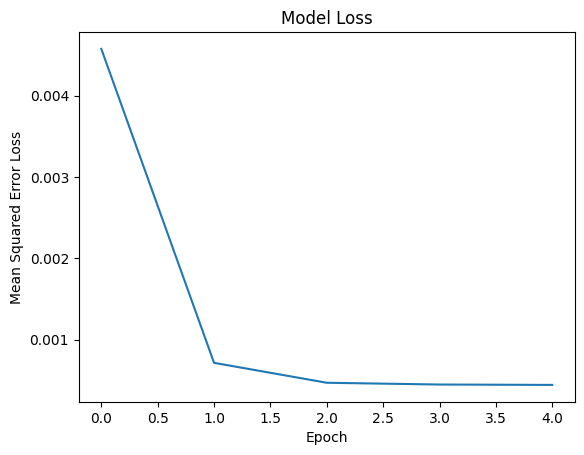

In [53]:
# Plot the loss graph

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.show()


In [54]:
print (X.shape)

(658, 4000, 5)


In [55]:
# Evaluate the model on the test set
loss = model.evaluate(X, y)
print(f"Test Loss: {loss}")


21/21 [==============================] - 5s 171ms/step - loss: 4.4114e-04
Test Loss: 0.0004411389527376741


In [56]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 4000, 50)          11200     
                                                                 
 dropout_4 (Dropout)         (None, 4000, 50)          0         
                                                                 
 lstm_5 (LSTM)               (None, 4000, 50)          20200     
                                                                 
 dropout_5 (Dropout)         (None, 4000, 50)          0         
                                                                 
 lstm_6 (LSTM)               (None, 4000, 50)          20200     
                                                                 
 dropout_6 (Dropout)         (None, 4000, 50)          0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [ ]:
# # Make predictions on the test set
# predictions = model.predict(X)

# # Inverse transform the predictions and actual values
# predictions = scaler.inverse_transform(np.hstack((X[:, -1, :4], predictions.reshape(-1, 1))))
# y_test_actual = scaler.inverse_transform(np.hstack((X[:, -1, :4], y.reshape(-1, 1))))

# # Print dimensions of predictions and y_test_actual for debugging
# print("Dimensions of predictions:", predictions.shape)
# print("Dimensions of y_test_actual:", y_test_actual.shape)

# # Calculate and print the root mean squared error (RMSE)
# rmse = np.sqrt(np.mean((predictions[:, 3] - y_test_actual[:, 3])**2))
# print(f"Root Mean Squared Error: {rmse}")

In [57]:

# Use the latest available data to make predictions for the future date
latest_data = data2.iloc[-time_steps:]
print(latest_data)
latest_date = latest_data['Date'].max().date()

future_date = latest_date + timedelta(days=1)

print(latest_date)
print(future_date)
count=0


input_sequence = latest_data[['Open', 'High', 'Low', 'Close', 'Volume']].values[-time_steps:]
# print(latest_data.values)


# print(input_sequence)

input_sequence_scaled = input_sequence.reshape(1, time_steps, 5)
print(input_sequence_scaled.shape)
# print(input_sequence_scaled)
predicted_scaled = model.predict(input_sequence_scaled)

# Inverse transform the predicted value to get the actual stock price
predicted_price_scaled = np.array([[predicted_scaled[0, 0], 0, 0, 0, 0]])  # Add zeros for other columns
predicted_price = scaler.inverse_transform(predicted_price_scaled)





latest_data = latest_data.append({'Date': future_date, 'Close': predicted_price[0][0]}, ignore_index=True)





print(latest_data)
print(f"Predicted Close Price for {future_date}: {latest_data.tail(1)['Close'].values[0]}")

           Date   Open   High    Low  Close      Volume
658  2007-09-03  88.90  88.30  85.65  88.00   1632200.0
659  2007-09-04  88.00  90.25  87.05  89.75   6987300.0
660  2007-09-05  89.75  92.40  90.05  92.40  11391700.0
661  2007-09-06  92.40  93.20  91.20  91.20   4293000.0
662  2007-09-07  91.20  91.20  87.75  88.75   2767800.0
...         ...    ...    ...    ...    ...         ...
4653 2023-12-20  22.94  23.40  21.60  22.18   2132500.0
4654 2023-12-21  22.20  22.75  22.20  22.72    604500.0
4655 2023-12-22  22.50  23.35  22.50  22.73   1679500.0
4656 2023-12-26  22.50  22.70  21.50  21.67   1026000.0
4657 2023-12-27  21.89  22.40  21.40  21.97   1846500.0

[4000 rows x 6 columns]
2023-12-27
2023-12-28
(1, 4000, 5)
1/1 [==============================] - 2s 2s/step
                     Date   Open   High    Low      Close      Volume
0     2007-09-03 00:00:00  88.90  88.30  85.65  88.000000   1632200.0
1     2007-09-04 00:00:00  88.00  90.25  87.05  89.750000   6987300.0
2     20

<ipython-input-57-3024a99bed7d>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  latest_data = latest_data.append({'Date': future_date, 'Close': predicted_price[0][0]}, ignore_index=True)


In [ ]:
# model.save(stock_name + '.h5')

In [ ]:

# Plotting historical stock prices
plt.plot(data2['Date'], data2['Close'], label='Historical Stock Price', color='blue')

# Plotting predicted stock prices for the next day
plt.scatter(future_date, predicted_price[0][0], label='Predicted Stock Price', color='red')

plt.title('Historical and Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Show the plot
plt.show()